# MATPLOTLIB PRACTICE 


In [1]:
#loading all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
planets=sns.load_dataset('planets')
planets.head()


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## Checking nan values in dataset


In [3]:
print('Total NaN values in Planets Dataset: ',planets.isnull().sum().sum())
pd.DataFrame({'Missing Values %': planets.isnull().sum()/len(planets.index)*100})

Total NaN values in Planets Dataset:  792


,Missing Values %
method,0.000000
number,0.000000
orbital_period,4.154589
mass,50.434783
distance,21.932367
year,0.000000


#### With above, we can see that there is 1 column with 50% of nan values, I will replace the missing column values with a median or mean of the column

In [4]:
planets.loc[planets['mass'].isnull(),'mass']=planets['mass'].median()
planets.loc[planets['distance'].isnull(),'distance']=planets['distance'].median()
pd.DataFrame({'Missing Values %': planets.isnull().sum()/len(planets.index)*100}) #CHECKING THE MISSING VALUES % FINALLY

,Missing Values %
method,0.000000
number,0.000000
orbital_period,4.154589
mass,0.000000
distance,0.000000
year,0.000000


In [5]:
planets.head() #CHECKING THE DATA

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### Horizontal Stacked Bars

Text(0.5, 1.0, 'Planets: Orbital Period & Distance covered throughout Years')

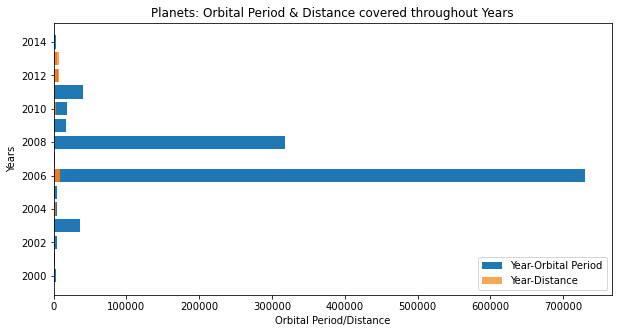

In [6]:
newdt=planets[planets['year']>1999] #filtered the data because the year before 1999 was missing data for orbital period
fig,axes=plt.subplots(figsize=(10,5))

plt.barh(data=newdt,y='year',width='orbital_period',label='Year-Orbital Period')
plt.barh(data=newdt,y='year',width='distance',label='Year-Distance',alpha=0.7)
plt.xlabel('Orbital Period/Distance')
plt.ylabel('Years')
plt.legend(loc=4)

plt.title('Planets: Orbital Period & Distance covered throughout Years')

Text(0.5, 1.0, 'Planets: Method and Mass')

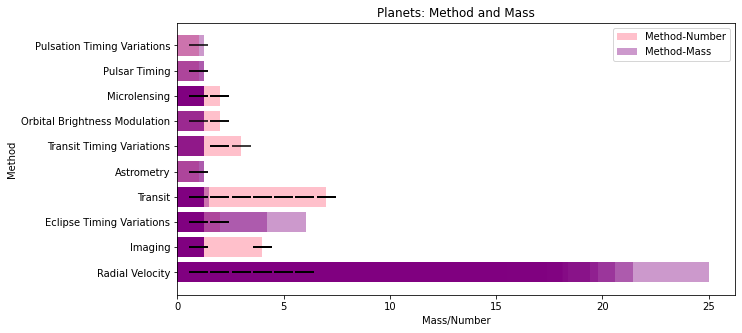

In [7]:
fig,axes=plt.subplots(figsize=(10,5))

plt.barh(data=newdt,y='method',width='number',xerr=0.45,label='Method-Number',color='pink')
plt.barh(data=newdt,y='method',width='mass',label='Method-Mass',alpha=0.4,color='purple')

    
plt.xlabel('Mass/Number')
plt.ylabel('Method')
plt.legend(loc=0)

plt.title('Planets: Method and Mass')

<AxesSubplot:ylabel='Frequency'>

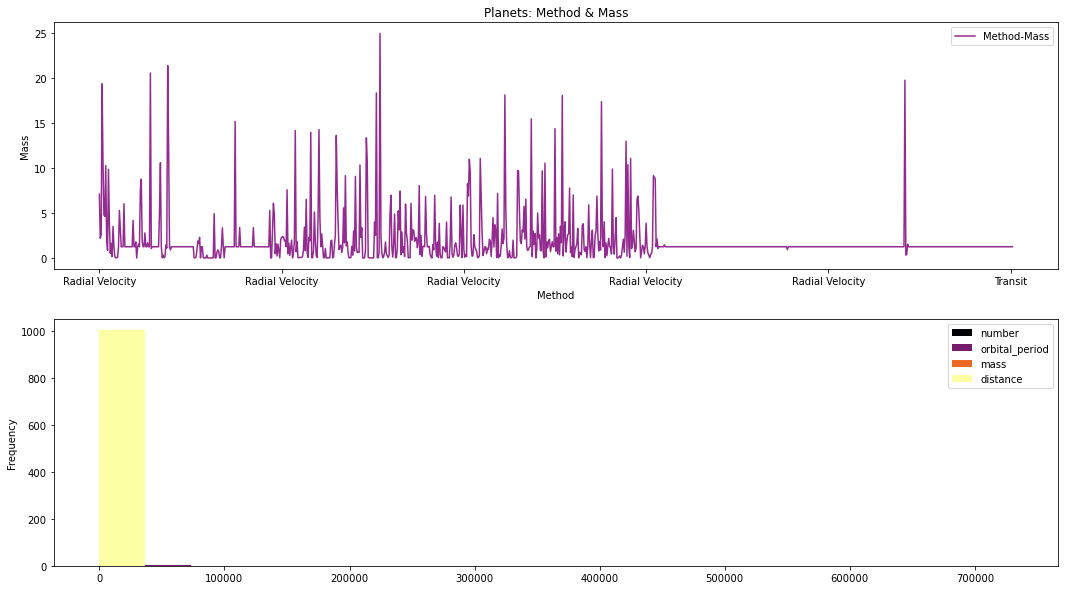

In [8]:
fig,axes=plt.subplots(figsize=(18,10),nrows=2,ncols=1)
newdt.plot(x='method',y='mass',ax=axes[0],
           label='Method-Mass',xlabel='Method',
           ylabel='Mass',color='#942b90',title='Planets: Method & Mass')
newdt.plot(kind='hist',x='year',ax=axes[1],bins=20,cmap='inferno')


## LOADING Tips DATASET

In [9]:
tips=sns.load_dataset('tips')
tips.sample(3)

,total_bill,tip,sex,smoker,day,time,size
147,11.87,1.63,Female,No,Thur,Lunch,2
74,14.73,2.20,Female,No,Sat,Dinner,2
188,18.15,3.50,Female,Yes,Sun,Dinner,3


## Bar chart

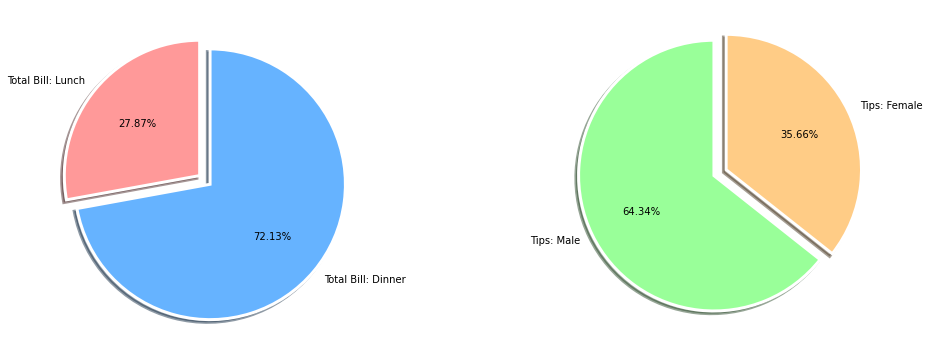

In [10]:
fig,axes=plt.subplots(figsize=(15,5),nrows=1,ncols=2)
bill_grouped=tips.groupby(['time'])['total_bill'].count()
labels1=['Total Bill: Lunch','Total Bill: Dinner']
colors1=['#ff9999','#66b3ff']
explode=[0,0.1]

axes[0].pie(bill_grouped,colors=colors1,labels=labels1,
        autopct='%1.2f%%',startangle=90,shadow=True,
        wedgeprops={'edgecolor':'white','linewidth':3},
       explode=explode
       )

tips_grouped=tips.groupby(['sex'])['tip'].count()
labels2=['Tips: Male','Tips: Female']
colors2=['#99ff99','#ffcc86']
explode=[0,0.1]

axes[1].pie(tips_grouped,colors=colors2,labels=labels2,
        autopct='%1.2f%%',startangle=90,shadow=True,
        wedgeprops={'edgecolor':'white','linewidth':3},
       explode=explode)


plt.tight_layout()

## LINE PLOTS

<AxesSubplot:title={'center':'Restaurant: Time Vs Size'}, xlabel='Time', ylabel='Size'>

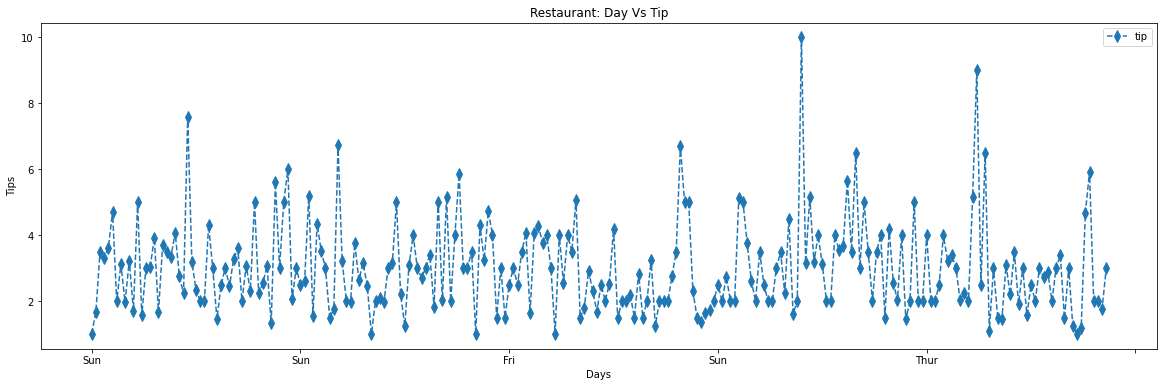

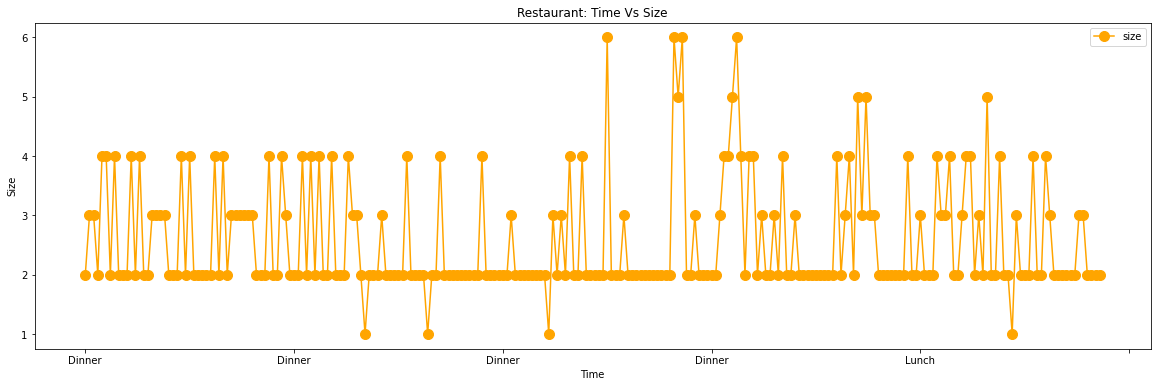

In [11]:
tips.plot(x='day',y='tip',linestyle="--",figsize=(20,6),
          marker='d',markersize=8,title='Restaurant: Day Vs Tip',xlabel='Days',ylabel='Tips')
tips.plot(x='time',y='size',color='orange',figsize=(20,6),
          markersize=10,marker='o',title='Restaurant: Time Vs Size',xlabel='Time',ylabel='Size')



## SCATTER PLOT

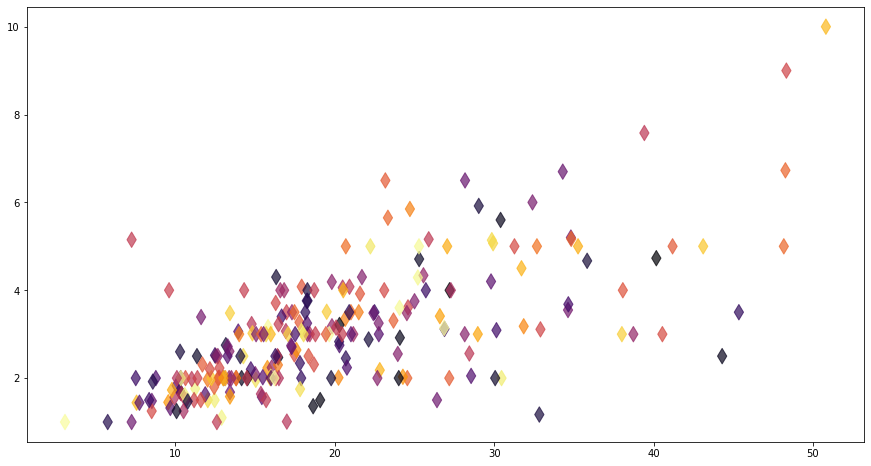

In [12]:
fig,axes=plt.subplots(figsize=(15,8))
colors=np.random.rand(244)
plt.scatter(data=tips,x='total_bill',y='tip',
            alpha=0.7,c=colors,marker='d',s=120,cmap='inferno')

## VERTICAL STACKED BAR

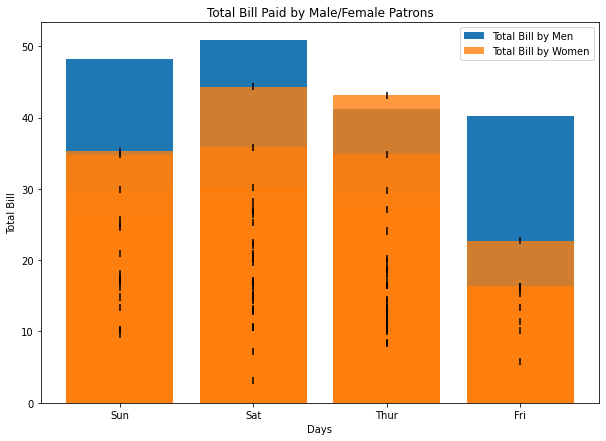

In [14]:
men=tips[tips['sex']=='Male']
women=tips[tips['sex']=='Female']

fig,ax=plt.subplots(figsize=(10,7))
plt.bar(data=men,x='day',height='total_bill',label='Total Bill by Men',)
plt.bar(data=women,x='day',height='total_bill',yerr=0.5,alpha=0.8,label='Total Bill by Women')


plt.ylabel('Total Bill')
plt.xlabel('Days')
plt.title('Total Bill Paid by Male/Female Patrons')


plt.legend(loc=0)
